In [1]:
import numpy as np

def triple_exponential_smoothing(X,L,α,β,γ,ϕ):

	def sig_ϕ(ϕ,m):
		return np.sum(np.array([np.power(ϕ,i) for i in range(m+1)]))

	C, S, B, F = (np.zeros( X.shape[0] ) for i in range(4))
	S[0], F[0] = X[0], X[0]
	B[0] = np.mean( X[L:2*L] - X[:L] ) / L
	m = 12
	sig_ϕ = sig_ϕ(ϕ,m)
	for t in range(1, X.shape[0]):
		S[t] = α * (X[t] - C[t % L]) + (1 - α) * (S[t-1] + ϕ * B[t-1])
		B[t] = β * (S[t] - S[t-1]) + (1-β) * ϕ * B[t-1]
		C[t % L] = γ * (X[t] - S[t]) + (1 - γ) * C[t % L]
		F[t] = S[t] + sig_ϕ * B[t] + C[t % L]
	return S

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')

In [2]:
ans=pd.read_csv('../data/trial/voting_withboosts.csv',index_col=0)

In [3]:
ans

,광진구,동대문구,성동구,중랑구
일시,,,,
20220101,2.158579,2.382135,2.155650,1.651358
20220102,2.380891,2.422915,2.283739,1.669951
20220103,2.636159,2.774697,2.591857,1.716550
20220104,2.362186,2.600521,2.430954,1.588913
20220105,2.627813,2.702486,2.570508,1.685573
...,...,...,...,...
20221126,8.775420,7.832803,7.730862,5.626625
20221127,8.531927,7.685429,7.539133,5.498948
20221128,8.251924,7.706543,7.238773,5.469092


In [4]:
ans.index = pd.to_datetime(ans.index,format='%Y%m%d')

<AxesSubplot: xlabel='일시'>

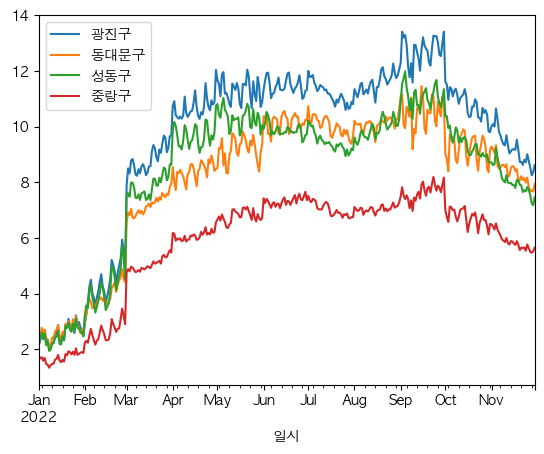

In [5]:
ans.plot()

<AxesSubplot: xlabel='일시'>

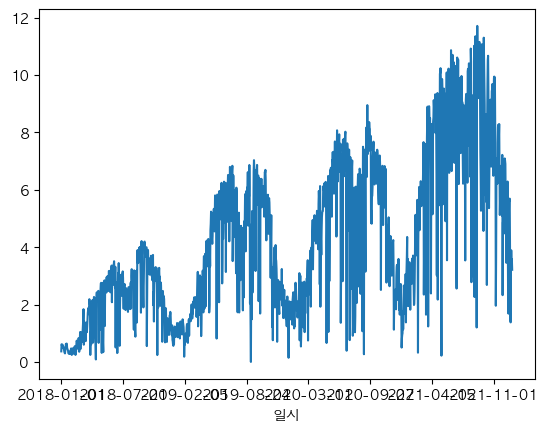

In [9]:
train_raw.iloc[:,1].plot()

In [6]:
train_raw=pd.read_csv('../data/pps/train_data.csv',index_col=0)
train_cleaned=pd.read_csv('../data/pps/train_data_cleaned.csv',index_col=0)

In [34]:
temp=train_raw.iloc[:,:4].mean()/train_cleaned.iloc[:,:4].mean()

In [42]:
ratio=temp.values

In [53]:
ratio

array([0.88792431, 0.89288301, 0.87942576, 0.89049452])

In [37]:
temp_ans=ans.copy()

In [39]:
temp_ans

,광진구,동대문구,성동구,중랑구
일시,,,,
2022-01-01,2.158579,2.382135,2.155650,1.651358
2022-01-02,2.380891,2.422915,2.283739,1.669951
2022-01-03,2.636159,2.774697,2.591857,1.716550
2022-01-04,2.362186,2.600521,2.430954,1.588913
2022-01-05,2.627813,2.702486,2.570508,1.685573
...,...,...,...,...
2022-11-26,8.775420,7.832803,7.730862,5.626625
2022-11-27,8.531927,7.685429,7.539133,5.498948
2022-11-28,8.251924,7.706543,7.238773,5.469092


In [43]:
for i,col in enumerate(temp_ans.columns):
    temp_ans[col] = temp_ans[col]*ratio[i]
    

In [46]:
temp_ans.to_csv('../data/trial/voting_withboosts_ratio_applied.csv')

In [47]:
temp_ans

,광진구,동대문구,성동구,중랑구
일시,,,,
2022-01-01,1.916655,2.126968,1.895734,1.470525
2022-01-02,2.114051,2.163380,2.008379,1.487082
2022-01-03,2.340710,2.477480,2.279346,1.528578
2022-01-04,2.097442,2.321961,2.137844,1.414918
2022-01-05,2.333299,2.413004,2.260571,1.500994
...,...,...,...,...
2022-11-26,7.791909,6.993777,6.798719,5.010478
2022-11-27,7.575705,6.862189,6.630108,4.896783
2022-11-28,7.327084,6.881041,6.365964,4.870197


In [48]:
ans=pd.read_csv('../data/trial/voting_withboosts.csv',index_col=0)

In [50]:
ans.iloc[:,:] = temp_ans.values

In [52]:
ans.to_csv('../data/trial/voting_withboosts_ratio_applied.csv')

In [ ]:
2.3015135877